# Chapter 11 Analysis of Spike-Field Coherence during Navigation

## Step 1

### Load the data

In [1]:
load('Ch11-spikes-LFP-1.mat') % load the multiscale dat


### Plot the first trail

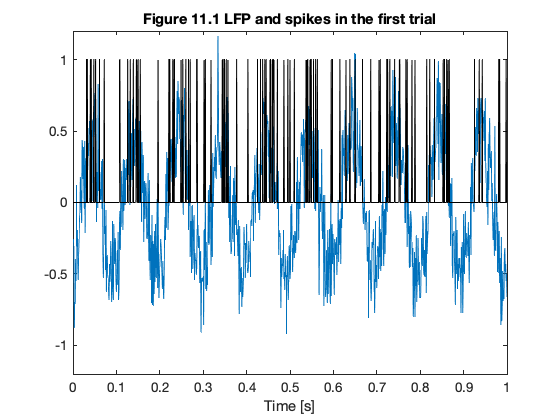

In [2]:
figure
plot(t, y(1, :))
hold on
plot(t, n(1, :), 'k')
hold off
ylim([-1, 1] * 1.2)
xlabel('Time [s]')
title('Figure 11.1 LFP and spikes in the first trial')


### Spike-triggered average (STA)

In [3]:
win = 100;
K = size(n, 1);
N = size(y, 2);
STA = zeros(K, 2 * win + 1);

for k = 1:K
    spks = find(n(k, :) == 1);

    for i = 1:length(spks)

        if spks(i) > win && spks(i) < N - win
            STA(k, :) = STA(k, :) + y(k, spks(i) - win:spks(i) + win) / length(spks);
        end % if

    end % for

end % for


#### Plot STA

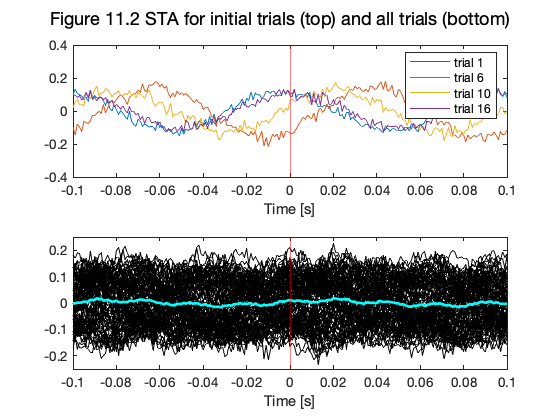

In [18]:
dt = t(2) - t(1);
t = linspace(-win * dt, win * dt, 2 * win + 1);

figure
subplot(2, 1, 1)
plot(t, STA([1, 6, 10, 16], :)')
xlim tight
ylim([-1, 1] * 0.4)
hold on
plot([0, 0], ylim, 'r')
legend(["trial 1", "trial 6", "trial 10", "trial 16"])
xlabel('Time [s]')

subplot(2, 1, 2)
plot(t, STA', 'k')
xlim tight
ylim([-1, 1] * 0.25)
hold on
plot(t, mean(STA), 'c', linewidth = 2)
plot([0, 0], ylim, 'r')
xlabel('Time [s]')

sgtitle('Figure 11.2 STA for initial trials (top) and all trials (bottom)')


### Phase-triggered average (PTA)

In [30]:
dt = t(2) - t(1);
fNQ = 1 / dt / 2;
ord = 100;

Wn1 = [9, 11] / fNQ;
b1 = fir1(ord, Wn1);
Wn2 = [44, 46] / fNQ;
b2 = fir1(ord, Wn2);

FTA1 = zeros(K, N);
FTA2 = zeros(K, N);

for k = 1:K
    Vlo1 = filter(b1, 1, y(k, :));
    phi1 = angle(hilbert(Vlo1));
    [~, indices1] = sort(phi1);
    FTA1(k, :) = n(k, indices1);

    Vlo2 = filter(b2, 1, y(k, :));
    phi2 = angle(hilbert(Vlo2));
    [~, indices2] = sort(phi2);
    FTA2(k, :) = n(k, indices2);
end % for


#### Plot PTA

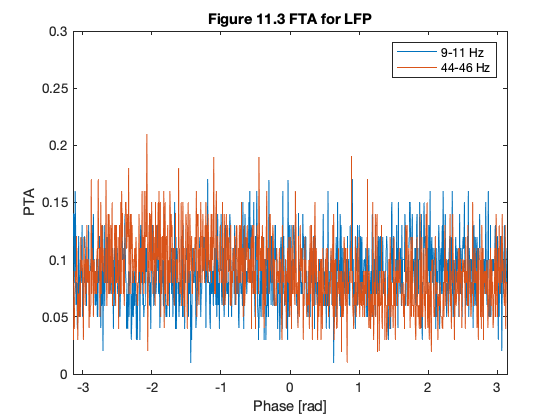

In [34]:
p = linspace(-pi, pi, N);

figure
plot(p, mean(FTA1, 1), p, mean(FTA2, 1))
xlim([-pi, pi])
ylim([0, .3])
legend("9-11 Hz", "44-46 Hz")
xlabel('Phase [rad]')
ylabel('PTA')
title('Figure 11.3 FTA for LFP')
